In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

### Load the data and prepare for the analysis

In [3]:
df = pd.read_csv("all_results_cluster_simp_pivot.tsv", sep="\t")
df_transposed = df.set_index(df.columns[0]).T
df_transposed.columns.name = None  # Remove the name of the columns index
df_transposed.reset_index(inplace=True)
df_transposed.rename(columns={'index': 'sample'}, inplace=True)
df_transposed

,sample,C1-NODE_10182_length_6088_cov_3.171059,C1-NODE_10195_length_6078_cov_3.637722,C1-NODE_10214_length_6069_cov_3.628700,C1-NODE_10275_length_6034_cov_20.391370,C1-NODE_10759_length_5749_cov_4.134528,C1-NODE_10936_length_5650_cov_3.782306,C1-NODE_10951_length_5639_cov_5.101719,C1-NODE_11616_length_5332_cov_8.322532,C1-NODE_12265_length_5059_cov_4.524780,...,P99-NODE_7142_length_6338_cov_5.212319,P99-NODE_7330_length_6194_cov_4.539176,P99-NODE_7500_length_6071_cov_6.372340,P99-NODE_8337_length_5493_cov_8.676535,P99-NODE_8489_length_5407_cov_3.222907,P99-NODE_8499_length_5403_cov_4.661930,P99-NODE_8922_length_5176_cov_11.691467,P99-NODE_9033_length_5114_cov_5.516110,P99-NODE_9357_length_4971_cov_3.037022,P99-NODE_9598_length_4864_cov_4.131836
0,C1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,C102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C103,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C104,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,C105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,P88,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132,P9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133,P94,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134,P95II,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Create a new column mentioned the group (condition) of each sample
# If sample column startswith "C" then the new condition column will be 0 (Control, let's keep it binary)
# If samples column startswith "P" then the new condition column will be 1 (Parkinson, let's keep it binary)
df_transposed['condition'] = df_transposed['sample'].apply(lambda x: 0 if x.startswith('C') else 1)

In [5]:
df_transposed

,sample,C1-NODE_10182_length_6088_cov_3.171059,C1-NODE_10195_length_6078_cov_3.637722,C1-NODE_10214_length_6069_cov_3.628700,C1-NODE_10275_length_6034_cov_20.391370,C1-NODE_10759_length_5749_cov_4.134528,C1-NODE_10936_length_5650_cov_3.782306,C1-NODE_10951_length_5639_cov_5.101719,C1-NODE_11616_length_5332_cov_8.322532,C1-NODE_12265_length_5059_cov_4.524780,...,P99-NODE_7330_length_6194_cov_4.539176,P99-NODE_7500_length_6071_cov_6.372340,P99-NODE_8337_length_5493_cov_8.676535,P99-NODE_8489_length_5407_cov_3.222907,P99-NODE_8499_length_5403_cov_4.661930,P99-NODE_8922_length_5176_cov_11.691467,P99-NODE_9033_length_5114_cov_5.516110,P99-NODE_9357_length_4971_cov_3.037022,P99-NODE_9598_length_4864_cov_4.131836,condition
0,C1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,C102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C103,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C104,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,C105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,P88,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
132,P9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
133,P94,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
134,P95II,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Split the data into features and labels (X (feature matrix) and y (label vector))

In [8]:
var_names = df_transposed.columns.tolist()[1:-1]
X = df_transposed.iloc[:,1:-1]
y = df_transposed.iloc[:,-1]

# the data is already normalized (we work), so we can skip normalization
# the label vector is also binary (0: Control, 1:Parkinson), so we can skip encoding
X = np.array(X)
y = np.array(y)

### Random Forest Classification with 5-fold cross-validation

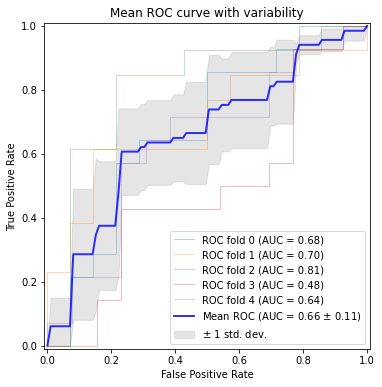

In [9]:
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = RandomForestClassifier(max_depth=5, n_estimators=100, min_samples_split=10, random_state=6969)

tprs = []
aucs = []
f1s = []
recalls = []
precisions = []
accuracies = []
feature_importances = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = sklearn.metrics.RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    preds = classifier.predict(X[test])
    f1_scoring = f1_score(y[test], preds)
    recall_scoring = recall_score(y[test], preds)
    precision_scoring = precision_score(y[test], preds)
    accuracy_scoring = accuracy_score(y[test], preds)
    f1s.append(f1_scoring)
    recalls.append(recall_scoring)
    precisions.append(precision_scoring)
    accuracies.append(accuracy_scoring)
    fold_importances = classifier.feature_importances_
    feature_importances.append(fold_importances)


mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Mean ROC curve with variability"
)
ax.legend(loc="lower right")
plt.show()

In [10]:
# print all the metrics (aucs, f1s, recalls, precisions, accuracies)
print(f"All AUCs: {aucs}")
print(f"Mean AUC: {np.mean(aucs)}")
print(f"Std AUC: {np.std(aucs)}")

print(f"All F1s: {f1s}")
print(f"Mean F1: {np.mean(f1s)}")
print(f"Std F1: {np.std(f1s)}")

print(f"All Recalls: {recalls}")
print(f"Mean Recall: {np.mean(recalls)}")
print(f"Std Recall: {np.std(recalls)}")

print(f"All Precisions: {precisions}")
print(f"Mean Precision: {np.mean(precisions)}")
print(f"Std Precision: {np.std(precisions)}")

print(f"All Accuracies: {accuracies}")
print(f"Mean Accuracy: {np.mean(accuracies)}")
print(f"Std Accuracy: {np.std(accuracies)}")

All AUCs: [0.6785714285714286, 0.6978021978021978, 0.8076923076923077, 0.48351648351648346, 0.6373626373626373]
Mean AUC: 0.6609890109890111
Std AUC: 0.10511033529888547
All F1s: [0.717948717948718, 0.6285714285714286, 0.7857142857142857, 0.5, 0.6428571428571429]
Mean F1: 0.655018315018315
Std F1: 0.09583285686165327
All Recalls: [1.0, 0.8461538461538461, 0.8461538461538461, 0.5714285714285714, 0.6428571428571429]
Mean Recall: 0.7813186813186813
Std Recall: 0.15456660195619554
All Precisions: [0.56, 0.5, 0.7333333333333333, 0.4444444444444444, 0.6428571428571429]
Mean Precision: 0.576126984126984
Std Precision: 0.10253042368144834
All Accuracies: [0.6071428571428571, 0.5185185185185185, 0.7777777777777778, 0.4074074074074074, 0.6296296296296297]
Mean Accuracy: 0.5880952380952381
Std Accuracy: 0.12292794263117336


### Check which feature was the most usefull for the data using feature_importances

In [11]:
feature_importances_df = pd.DataFrame(feature_importances, columns=var_names)
feature_importances_mean = feature_importances_df.mean()
feature_importances_std = feature_importances_df.std()


In [12]:
#get the top 50 features
top50 = feature_importances_mean.sort_values(ascending=False).head(50)
print(top50.head(5))
#get only the names
top50_names = top50.index.tolist()

C82-NODE_7304_length_4567_cov_6.518174        0.005878
C96-NODE_25760_length_2889_cov_18.473536      0.005658
P10old-NODE_33532_length_2078_cov_6.431043    0.005419
C32-NODE_8354_length_3881_cov_7.759279        0.004800
C70-NODE_13237_length_4608_cov_250.600483     0.004168
dtype: float64


### Re-run the model with only top50 phages. (top feature importances)

In [13]:
#modify the df_transposed dataframe, so that we have only the columns of top50_names
df_transposed_top50 = df_transposed[['sample'] + top50_names + ['condition']]

In [14]:
df_transposed_top50

,sample,C82-NODE_7304_length_4567_cov_6.518174,C96-NODE_25760_length_2889_cov_18.473536,P10old-NODE_33532_length_2078_cov_6.431043,C32-NODE_8354_length_3881_cov_7.759279,C70-NODE_13237_length_4608_cov_250.600483,C85-NODE_11837_length_2963_cov_30.800550,C111-NODE_23640_length_2316_cov_55.985847,C40-NODE_68091_length_1503_cov_723.688536,P46-NODE_16692_length_2065_cov_6.340299,...,P45-NODE_49532_length_1367_cov_3.384146,P20-NODE_41802_length_1513_cov_11.165981,C21-NODE_30039_length_3501_cov_61.830818,C86-NODE_40369_length_1444_cov_294.665947,C118-NODE_21331_length_2364_cov_17.050671,C21-NODE_40572_length_2624_cov_20.678085,C46-NODE_49764_length_1748_cov_2.760780,P12-NODE_29248_length_1617_cov_33.636364,P94-NODE_42289_length_1084_cov_2.232264,condition
0,C1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,C102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C103,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C104,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,C105,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,P88,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
132,P9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
133,P94,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
134,P95II,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
var_names = df_transposed.columns.tolist()[1:-1]
X_top50 = df_transposed_top50.iloc[:,1:-1]
y_top50 = df_transposed_top50.iloc[:,-1]

# the data is already normalized (we work), so we can skip normalization
# the label vector is also binary (0: Control, 1:Parkinson), so we can skip encoding
X_top50 = np.array(X_top50)
y_top50 = np.array(y_top50)

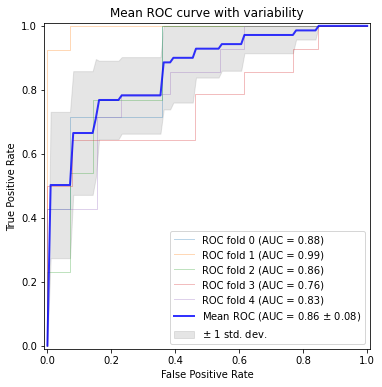

In [16]:
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = RandomForestClassifier(max_depth=5, n_estimators=100, min_samples_split=10, random_state=6969)

tprs = []
aucs = []
f1s = []
recalls = []
precisions = []
accuracies = []
feature_importances = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X_top50, y_top50)):
    classifier.fit(X_top50[train], y_top50[train])
    viz = sklearn.metrics.RocCurveDisplay.from_estimator(
        classifier,
        X_top50[test],
        y_top50[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    preds = classifier.predict(X_top50[test])
    f1_scoring = f1_score(y_top50[test], preds)
    recall_scoring = recall_score(y_top50[test], preds)
    precision_scoring = precision_score(y_top50[test], preds)
    accuracy_scoring = accuracy_score(y_top50[test], preds)
    f1s.append(f1_scoring)
    recalls.append(recall_scoring)
    precisions.append(precision_scoring)
    accuracies.append(accuracy_scoring)
    fold_importances = classifier.feature_importances_
    feature_importances.append(fold_importances)


mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Mean ROC curve with variability"
)
ax.legend(loc="lower right")
plt.show()

In [17]:
# print all the metrics (aucs, f1s, recalls, precisions, accuracies)
print(f"All AUCs: {aucs}")
print(f"Mean AUC: {np.mean(aucs)}")
print(f"Std AUC: {np.std(aucs)}")

print(f"All F1s: {f1s}")
print(f"Mean F1: {np.mean(f1s)}")
print(f"Std F1: {np.std(f1s)}")

print(f"All Recalls: {recalls}")
print(f"Mean Recall: {np.mean(recalls)}")
print(f"Std Recall: {np.std(recalls)}")

print(f"All Precisions: {precisions}")
print(f"Mean Precision: {np.mean(precisions)}")
print(f"Std Precision: {np.std(precisions)}")

print(f"All Accuracies: {accuracies}")
print(f"Mean Accuracy: {np.mean(accuracies)}")
print(f"Std Accuracy: {np.std(accuracies)}")

All AUCs: [0.8775510204081632, 0.9945054945054945, 0.8626373626373626, 0.7637362637362637, 0.8296703296703297]
Mean AUC: 0.8656200941915226
Std AUC: 0.07541271852859975
All F1s: [0.7741935483870968, 0.9285714285714286, 0.7142857142857143, 0.6206896551724138, 0.7692307692307693]
Mean F1: 0.7613942231294846
Std F1: 0.10019025825966833
All Recalls: [0.8571428571428571, 1.0, 0.7692307692307693, 0.6428571428571429, 0.7142857142857143]
Mean Recall: 0.7967032967032968
Std Recall: 0.12344920149436146
All Precisions: [0.7058823529411765, 0.8666666666666667, 0.6666666666666666, 0.6, 0.8333333333333334]
Mean Precision: 0.7345098039215687
Std Precision: 0.10074386920231494
All Accuracies: [0.75, 0.9259259259259259, 0.7037037037037037, 0.5925925925925926, 0.7777777777777778]
Mean Accuracy: 0.75
Std Accuracy: 0.10829771494232183
